## Build an SVM model to classify whether a person has diabetes or not

# import all library 

In [1]:
#importing models
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Analyse and Explore data 

## read data 

In [3]:
df= pd.read_csv("diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# all columns

In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# summary of data

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# check if we have missing value in data

In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Visualisation of dataset 

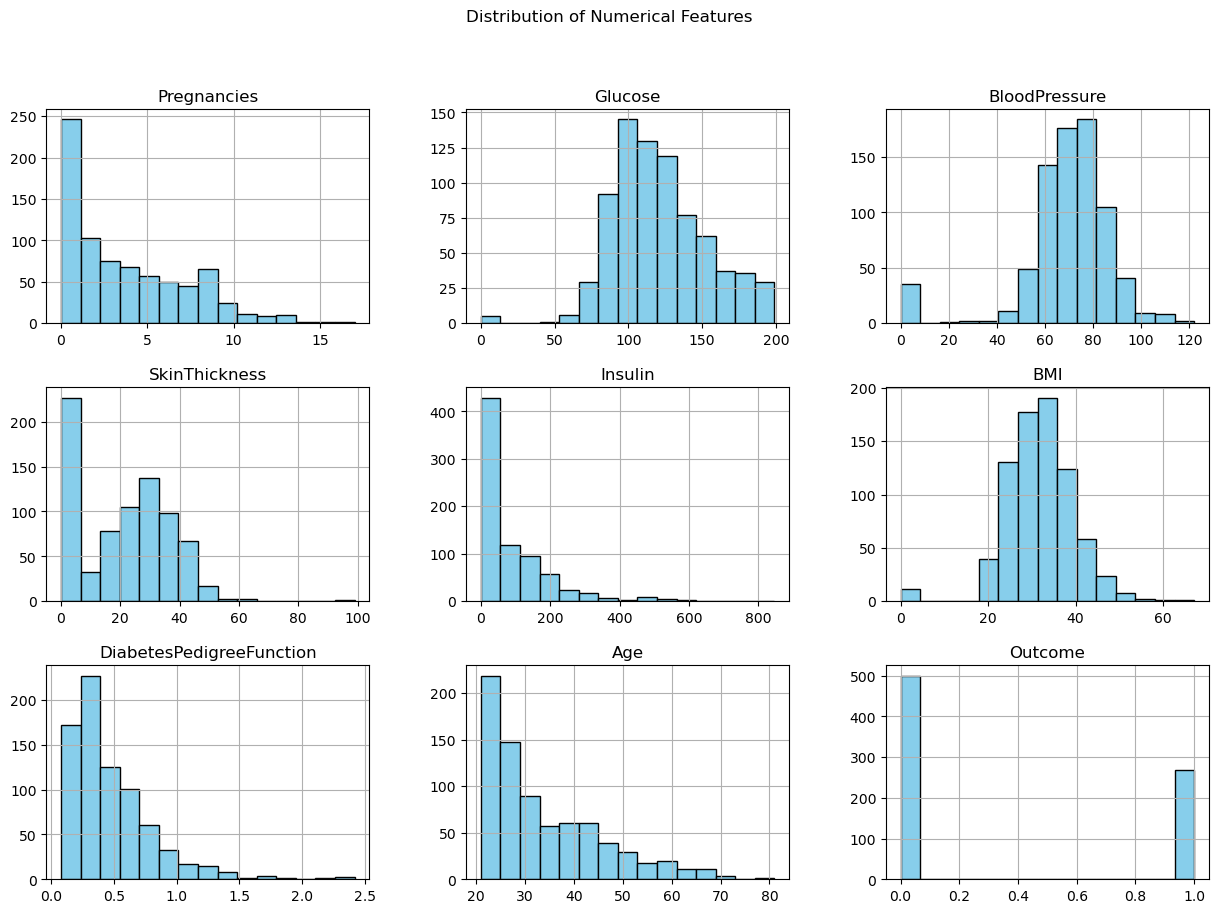

In [9]:
df.hist(bins=15, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features')
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_10480\1525569987.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_10480\1525569987.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_10480\1525569987.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_10480\1525569987.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

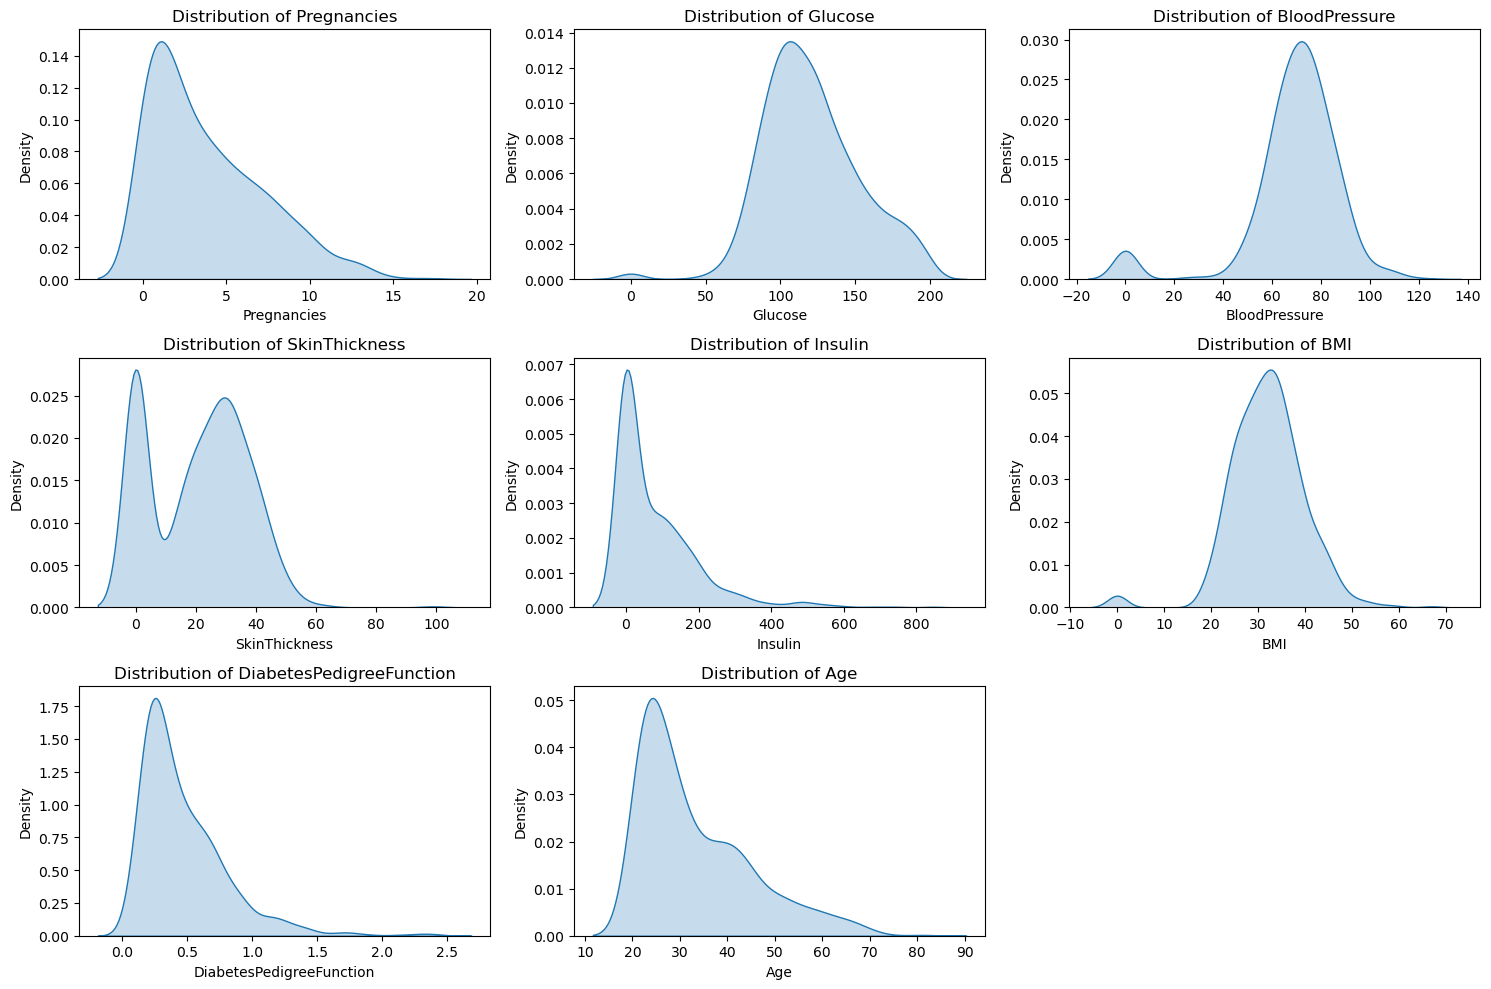

In [10]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1], 1):  # Exclude 'Outcome'
    plt.subplot(3, 3, i)
    sns.kdeplot(df[column], shade=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# correlation of features 

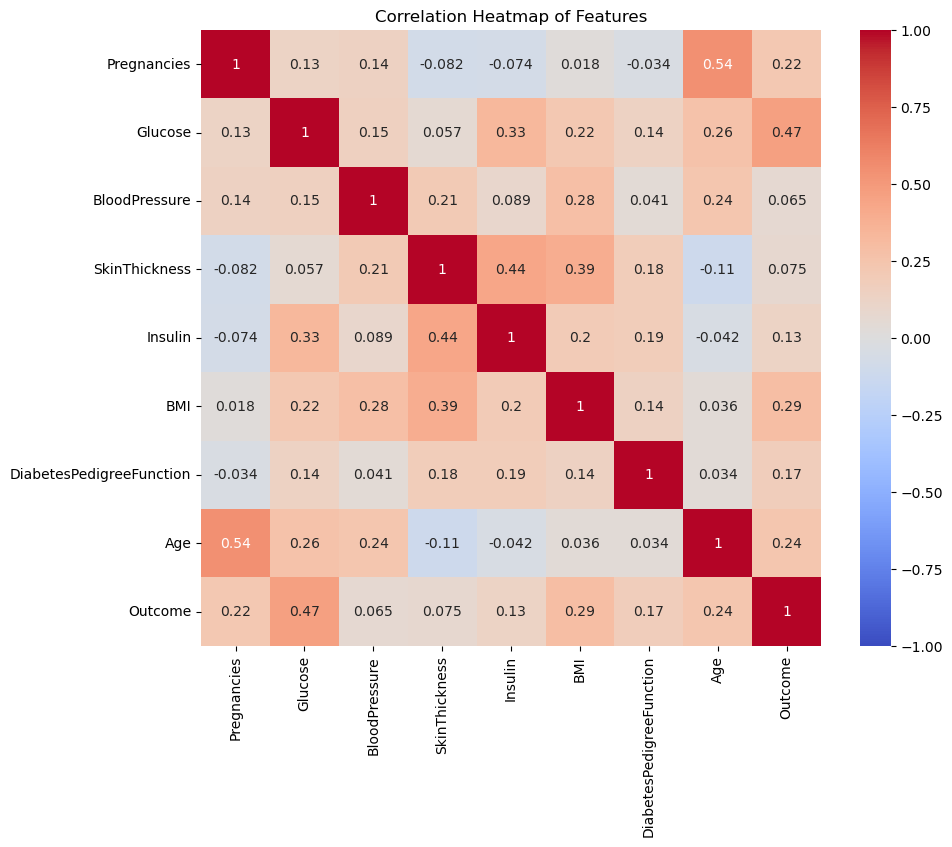

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Features')
plt.show()

# Insulin vs Diabetes Pedigree Function by Outcome

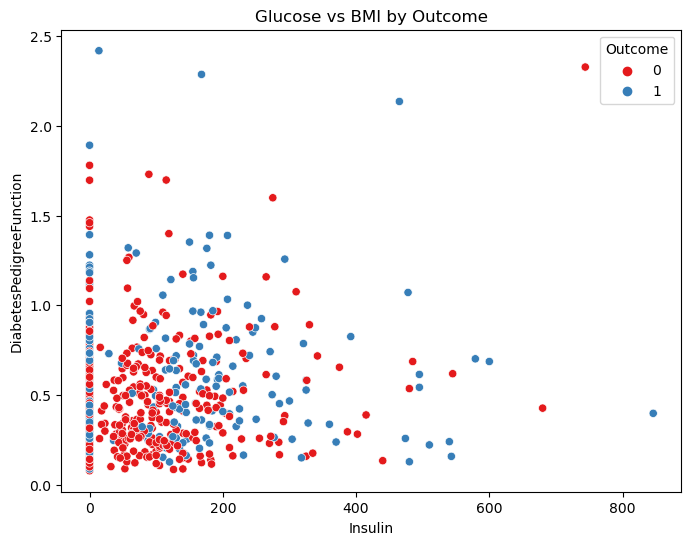

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Insulin', y='DiabetesPedigreeFunction', hue='Outcome', palette='Set1')
plt.title('Glucose vs BMI by Outcome')
plt.show()

# category of feature Outcome

In [16]:
df['Outcome'].unique()

array([1, 0], dtype=int64)

In [17]:
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


In [18]:
x = df.drop('Outcome', axis=1).copy()

In [19]:
y = df['Outcome']

# here we split data 

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state= 36)

In [21]:
x_train_scaled = scale(x_train)
x_test_scaled = scale(x_test)

# apply SVM 

In [22]:
clf_svm = SVC(random_state=36)
clf_svm.fit(x_train_scaled, y_train)

SVC(random_state=36)

In [23]:
y_pred = clf_svm.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.7662337662337663


In [24]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[132,  16],
       [ 38,  45]], dtype=int64)

# Confusion matrix to look quality of our resultat

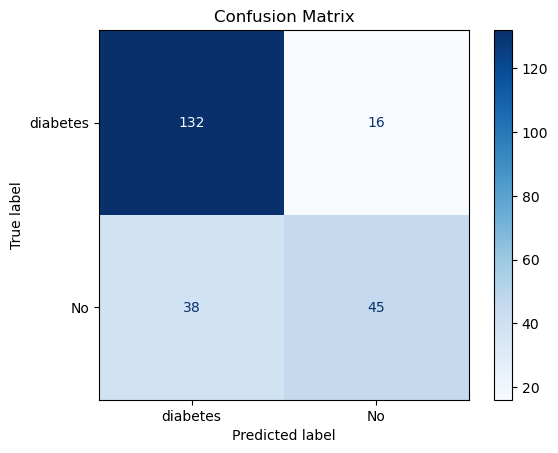

In [31]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['diabetes', 'No'])

# Plot the confusion matrix
disp.plot(cmap='Blues', values_format='d', ax=plt.gca())
plt.title('Confusion Matrix')
plt.show()

# using apply cross entropy 

In [26]:
param_grid = [
    {'C': [0.5, 1, 10, 100],
     'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
     'kernel' : ['rbf']},
]

optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring= 'accuracy',
    verbose=0
)
optimal_params.fit(x_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


In [27]:
clf_svm = SVC(random_state=36, C=10, gamma= 0.001)
clf_svm.fit(x_train_scaled, y_train)

SVC(C=10, gamma=0.001, random_state=36)

In [28]:
y_pred= clf_svm.predict(x_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.7748917748917749


In [29]:
cm2 = confusion_matrix(y_test, y_pred)
cm2

array([[138,  10],
       [ 42,  41]], dtype=int64)

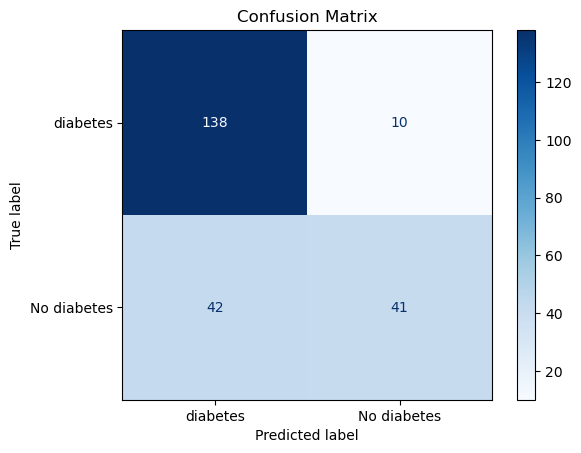

In [30]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=['diabetes', 'No diabetes'])

# Plot the confusion matrix for cm2
disp.plot(cmap='Blues', values_format='d', ax=plt.gca())
plt.title('Confusion Matrix')
plt.show()